# Problem Set 1 CS174
---
The following problem set will focus on the lessons on Python and basic string manipulation. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards) **1 pt.**

2. Write a function that checks whether a number is prime or not **1 pt.**

3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

5. Load `Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html` and find out the ff (show the code): **10 pts.**
       - How many unique words are there?
       - List what will Rick Astley never do?
       - Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**
       - Use the dictionary from above to create a word count histogram.
       
### Bonus:
Compare any non-English song (as long as lyrics are Romanized ) and a contemporary one in English, and create word frequency histograms of both. Compare and discuss any interesting findings or insights. **5 pts.**

Deadline **Feb 4 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

# 1

In [1]:
def isPalindrome(string):
    return string == string[::-1]

print(isPalindrome("bro orb"))

True


# 2

In [11]:
def isPrime(num):
    if num < 2 or isinstance(num, float):
        return None
    elif num == 2:
        return True
    elif num % 2 == 0 or num % 3 == 0:
        return False
    
    i = 5
    while i**2 <= num:
        if num % i == 0 or num % (i+2) == 0:
            return False
        i += 6

    return True

print(isPrime(199))

True


# 3

In [3]:
import re

dic = {}
with open("./data/allstar.txt") as f:
    chords = ""
    key = ""

    for line in f:
        if line[0] == "[":
            if chords:
                dic[key] = chords[:-2]
                chords = ""
            key = line[1:-2]
        # I made double consecutive spaces as basis if the line contains chords lol
        elif "  " in line:
            # replace consecutive white spaces with single comma
            chordsStr = re.sub("\s+", ", ", line.strip())
            chords += chordsStr + ", "

    dic[key] = chords[:-2]
    
print(dic)

{'Verse 1': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C', 'Chorus 1': 'G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C', 'Verse 2': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C', 'Chorus 2': 'G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C, G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C', 'Verse 3': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C', 'Chorus 3': 'G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C'}


# 4

In [4]:
dic = {}
with open("./data/allstar.txt") as f:
    for line in f:
        if "  " not in line and line[0] is not "[":
            chordsStr = re.sub("\s+", ", ", line.strip()).lower()
            for string in chordsStr.split(", "):
                if string in dic.keys():
                    dic[string] += 1
                else:
                    dic[string] = 1
    
print(dic)

{'somebody': 2, 'once': 2, 'told': 1, 'me': 2, 'the': 26, 'world': 1, 'is': 6, 'gonna': 1, 'roll': 1, 'i': 8, "ain't": 1, 'sharpest': 1, 'tool': 1, 'in': 3, 'shed': 1, 'she': 1, 'was': 1, 'looking': 1, 'kinda': 1, 'dumb': 3, 'with': 3, 'her': 3, 'finger': 1, 'and': 12, 'thumb': 1, 'shape': 1, 'of': 1, 'an': 5, '"l"': 1, 'on': 6, 'forehead': 1, '': 10, 'well': 3, 'years': 2, 'start': 2, 'coming': 4, 'they': 3, "don't": 6, 'stop': 2, 'back': 4, 'to': 10, 'rules': 2, 'hit': 2, 'ground': 2, 'running': 2, "didn't": 2, 'make': 2, 'sense': 2, 'not': 2, 'live': 2, 'for': 3, 'fun': 2, 'your': 8, 'brain': 2, 'gets': 5, 'smart': 2, 'but': 4, 'head': 2, 'so': 7, 'much': 4, 'do': 2, 'see': 2, "what's": 2, 'wrong': 2, 'taking': 2, 'streets': 2, "you'll": 4, 'never': 5, 'know': 2, 'if': 4, 'you': 7, 'go': 6, 'shine': 2, 'glow': 2, 'hey': 8, 'now': 9, "you're": 9, 'all': 9, 'star': 8, 'get': 15, 'game': 4, 'on,': 4, 'play': 4, 'a': 8, 'rock': 4, 'show': 4, 'paid': 4, 'that': 4, 'glitters': 4, 'gold': 

# 5 

How many unique words are there?

In [5]:
import codecs
import matplotlib.pyplot as plt

with codecs.open("./data/Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html", 'r') as f:
    content = f.readlines()
    startIndex = [x for x in range(len(content)) if "<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->" in content[x]][0] + 1
    endIndex = [y for y in range(startIndex, len(content)) if "</div>" in content[y]][0]
    uniqueWordsDict = {}
    
    for i in range(startIndex, endIndex): 
        wordList = content[i].lstrip().replace("<br>", "").replace(",", "").replace("(", "").replace(")", "").lower().split()

        for word in wordList:
            if word in uniqueWordsDict.keys():
                uniqueWordsDict[word] += 1
            else:
                uniqueWordsDict[word] = 1

    print(f"Number of unique words: {len(uniqueWordsDict)}")

Number of unique words: 78


List what will Rick Astley never do?

In [6]:
    neverDoList = []
    for i in range(startIndex, endIndex):
        if content[i].lower().count("never gonna") == 1:
            action = content[i][12:].replace("<br>", "").replace("\n", "")
            if action not in neverDoList:
                neverDoList.append(action)
    print(f"Never gonna do list:\n{neverDoList}")

Never gonna do list:
['give you up', 'let you down', 'run around and desert you', 'make you cry', 'say goodbye', 'tell a lie and hurt you']


Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**

In [7]:
    print(f"No. of occurences of each word:\n{uniqueWordsDict}")

No. of occurences of each word:
{"we're": 3, 'no': 1, 'strangers': 1, 'to': 4, 'love': 1, 'you': 41, 'know': 5, 'the': 3, 'rules': 1, 'and': 16, 'so': 3, 'do': 1, 'i': 3, 'a': 7, 'full': 1, "commitment's": 1, 'what': 1, "i'm": 4, 'thinking': 1, 'of': 1, "wouldn't": 1, 'get': 1, 'this': 1, 'from': 1, 'any': 1, 'other': 3, 'guy': 1, 'just': 2, 'wanna': 2, 'tell': 9, 'how': 3, 'feeling': 3, 'gotta': 2, 'make': 8, 'understand': 2, 'never': 40, 'gonna': 42, 'give': 14, 'up': 10, 'let': 6, 'down': 6, 'run': 6, 'around': 6, 'desert': 6, 'cry': 6, 'say': 8, 'goodbye': 6, 'lie': 6, 'hurt': 6, "we've": 2, 'known': 2, 'each': 2, 'for': 2, 'long': 2, 'your': 2, "heart's": 2, 'been': 4, 'aching': 2, 'but': 2, "you're": 3, 'too': 3, 'shy': 2, 'it': 4, 'inside': 2, 'we': 4, 'both': 2, "what's": 2, 'going': 2, 'on': 2, 'game': 2, 'play': 2, 'if': 1, 'ask': 1, 'me': 2, "don't": 1, 'blind': 1, 'see': 1, 'ooh': 2}


Use the dictionary from above to create a word count histogram.

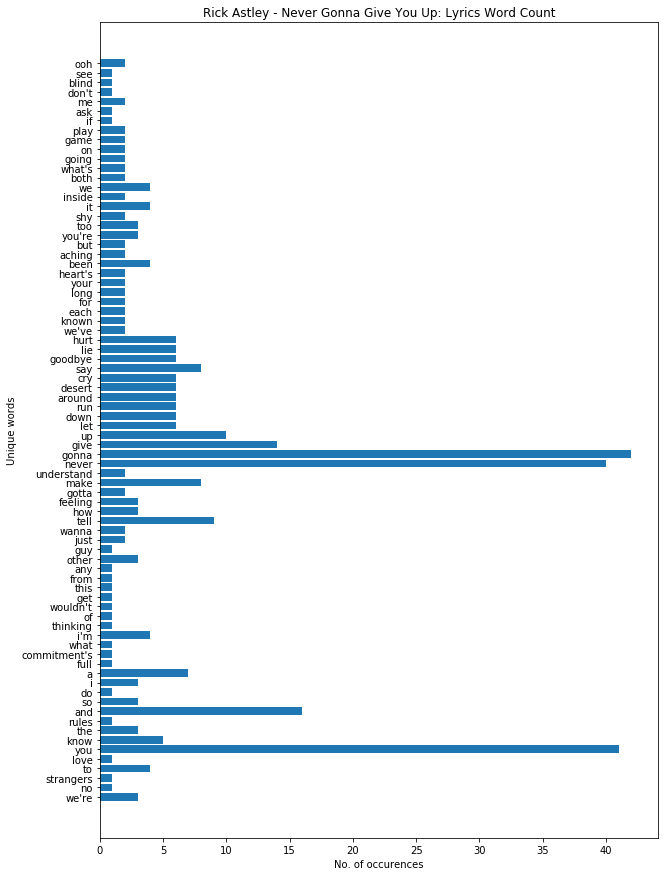

In [8]:
    plt.figure(figsize=(10, 15))
    plt.title('Rick Astley - Never Gonna Give You Up: Lyrics Word Count')
    plt.ylabel('Unique words')
    plt.xlabel('No. of occurences')
    plt.barh(list(uniqueWordsDict.keys()), list(uniqueWordsDict.values()))
    plt.show()

### Bonus:

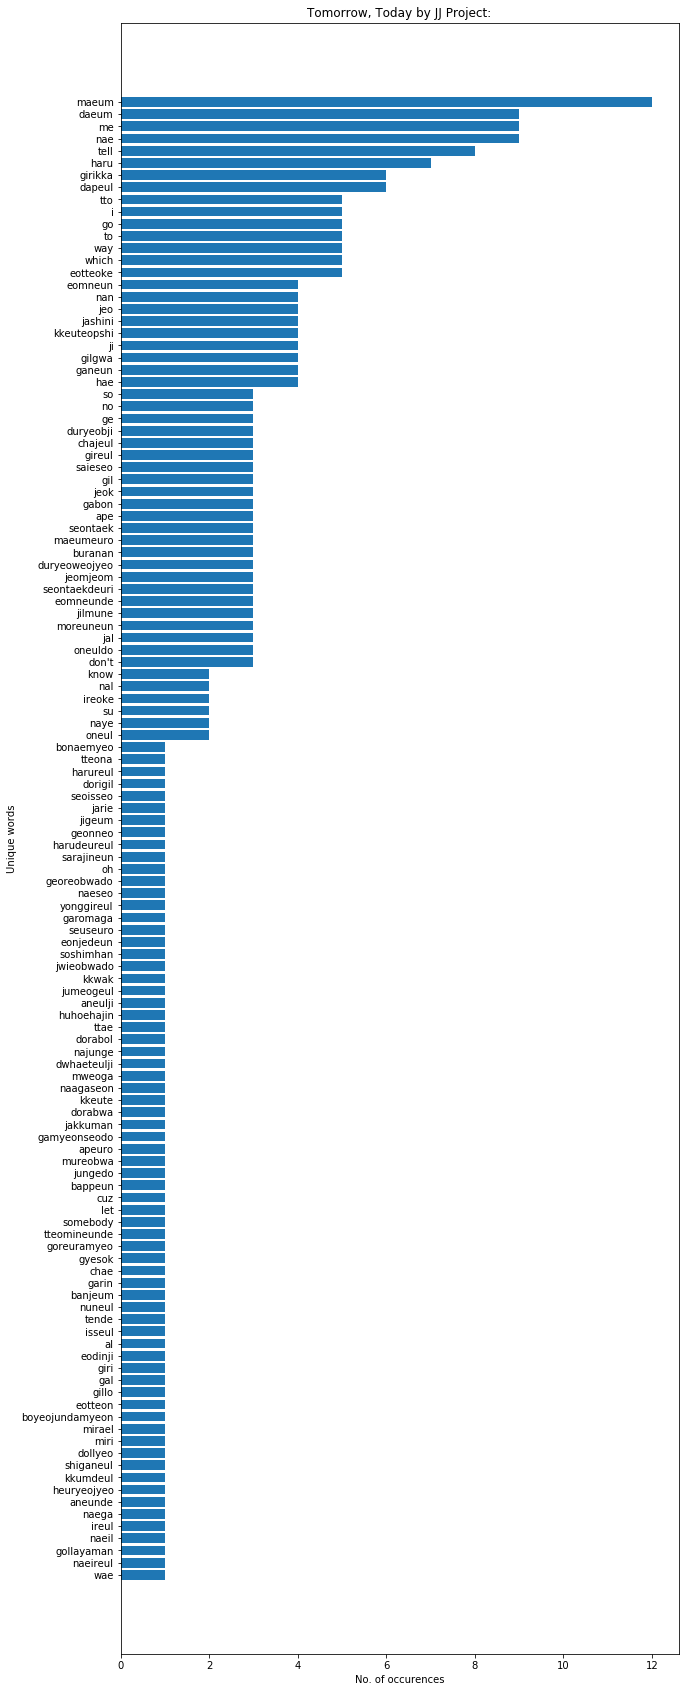

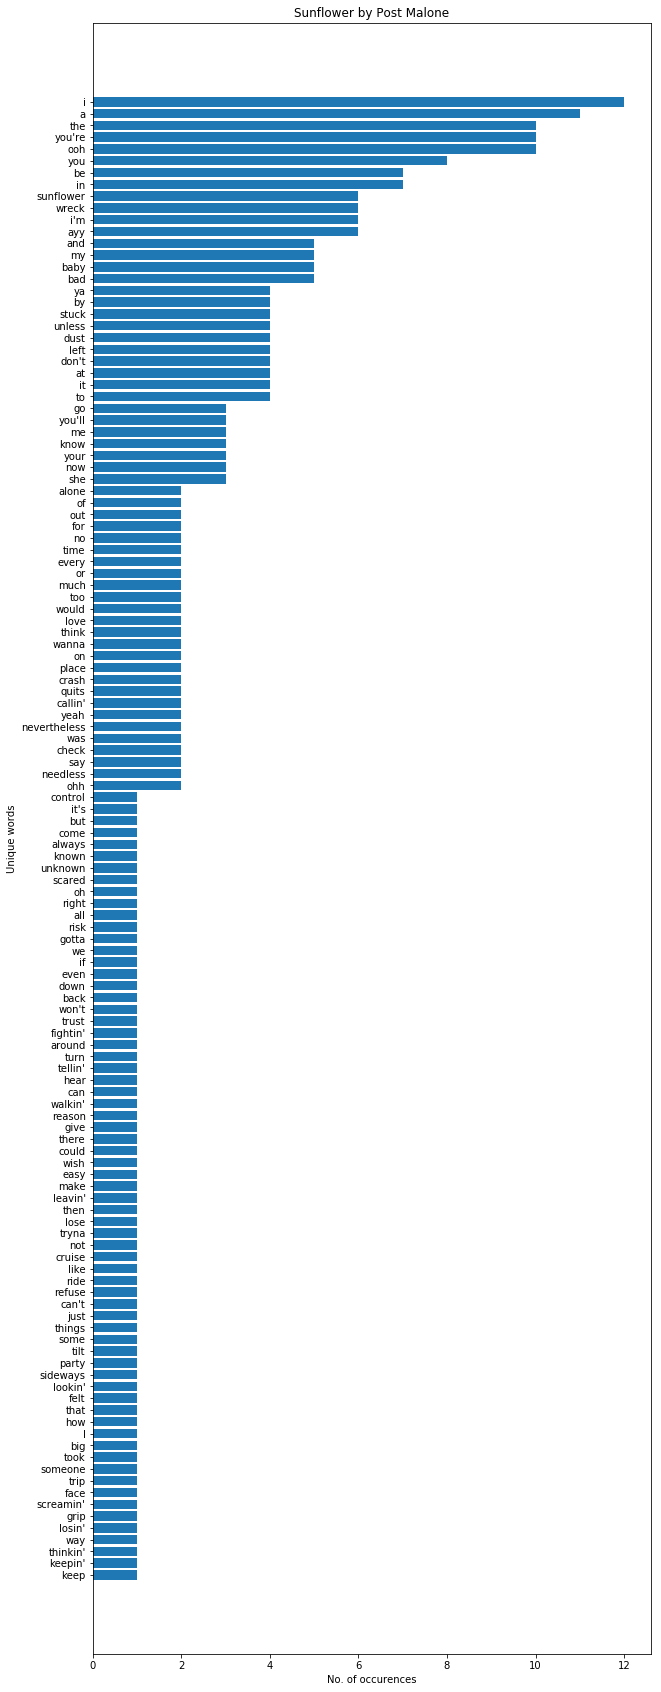

In [9]:
import urllib.request
import matplotlib.pyplot as plt

def getUniqueWordsDict(url, startLine, endLine):
    with urllib.request.urlopen(url) as fp:
        contentBytes = fp.readlines()

        startIndex = [x for x in range(len(contentBytes)) if startLine in contentBytes[x].decode("utf8")][0] + 1
        endIndex = [y for y in range(startIndex, len(contentBytes)) if endLine in contentBytes[y].decode("utf8")][0]
        uniqueWordsDict = {}

        for i in range(startIndex, endIndex): 
            line = contentBytes[i].decode("utf8")
            if line[0] == "<":
                continue
            wordList = line.lstrip().replace("<br>", "").replace(",", "").replace("(", "").replace(")", "").replace("?", "").replace("-", " ").lower().split()

            for word in wordList:
                if word in uniqueWordsDict.keys():
                    uniqueWordsDict[word] += 1
                else:
                    uniqueWordsDict[word] = 1
        sortedUniqueWordsDict = {k: v for k, v in sorted(uniqueWordsDict.items(), key=lambda item: item[1])}
        return sortedUniqueWordsDict

def generateWordCountBar(title, data):
    plt.figure(figsize=(10, 30))
    plt.title(title)
    plt.ylabel('Unique words')
    plt.xlabel('No. of occurences')
    plt.barh(list(data.keys()), list(data.values()))
    plt.show()

dict1 = getUniqueWordsDict("https://www.azlyrics.com/lyrics/jjproject/tomorrowtoday.html", 
                         "<i>[Romanized:]</i>", 
                         "<i>[Korean:]</i>")
generateWordCountBar("Tomorrow, Today by JJ Project:", dict1)

dict2 = getUniqueWordsDict("https://www.azlyrics.com/lyrics/postmalone/sunflower.html", 
                         "<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->", 
                         "</div>")
generateWordCountBar("Sunflower by Post Malone", dict2)

Based on these 2 songs, the former has relatively more words used than the latter. And there are more words in the Korean song that only appeared once. In the former, the most frequently used words show what the song is about while the English song's frequently used words are pronouns and articles.